In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
file_path = 'human_vital_signs_dataset_2024.csv'
df = pd.read_csv(file_path)
df.head()


,Patient ID,Heart Rate,Respiratory Rate,Timestamp,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category
0,1,60,12,2024-07-19 21:53:45.729841,36.861707,95.702046,124,86,37,Female,91.541618,1.679351,0.121033,38,32.459031,98.666667,High Risk
1,2,63,18,2024-07-19 21:52:45.729841,36.511633,96.689413,126,84,77,Male,50.704921,1.992546,0.117062,42,12.771246,98.000000,High Risk
2,3,63,15,2024-07-19 21:51:45.729841,37.052049,98.508265,131,78,68,Female,90.316760,1.770228,0.053200,53,28.821069,95.666667,Low Risk
3,4,99,16,2024-07-19 21:50:45.729841,36.654748,95.011801,118,72,41,Female,96.006188,1.833629,0.064475,46,28.554611,87.333333,High Risk
4,5,69,16,2024-07-19 21:49:45.729841,36.975098,98.623792,138,76,25,Female,56.020006,1.866419,0.118484,62,16.081438,96.666667,High Risk


In [19]:
df.duplicated().sum()


0

In [20]:
df.isnull().sum()

Patient ID                  0
Heart Rate                  0
Respiratory Rate            0
Timestamp                   0
Body Temperature            0
Oxygen Saturation           0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
Age                         0
Gender                      0
Weight (kg)                 0
Height (m)                  0
Derived_HRV                 0
Derived_Pulse_Pressure      0
Derived_BMI                 0
Derived_MAP                 0
Risk Category               0
dtype: int64

In [21]:
# 1. Convert Timestamp to datetime and extract useful features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert to datetime
df['Year'] = df['Timestamp'].dt.year  # Extract year
df['Month'] = df['Timestamp'].dt.month  # Extract month
df['Day'] = df['Timestamp'].dt.day  # Extract day
df['Hour'] = df['Timestamp'].dt.hour  # Extract hour
df.drop(columns=['Timestamp'], inplace=True)  # Drop the original column if not needed

# 2. Convert Gender to binary
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})  # 1 for Male, 0 for Female

# 3. Convert Risk Category to numerical labels
risk_mapping = {'Low Risk': 0, 'High Risk': 1}
df['Risk Category'] = df['Risk Category'].map(risk_mapping)

# Display the updated DataFrame
df.head()


,Patient ID,Heart Rate,Respiratory Rate,Body Temperature,Oxygen Saturation,Systolic Blood Pressure,Diastolic Blood Pressure,Age,Gender,Weight (kg),Height (m),Derived_HRV,Derived_Pulse_Pressure,Derived_BMI,Derived_MAP,Risk Category,Year,Month,Day,Hour
0,1,60,12,36.861707,95.702046,124,86,37,0,91.541618,1.679351,0.121033,38,32.459031,98.666667,1,2024,7,19,21
1,2,63,18,36.511633,96.689413,126,84,77,1,50.704921,1.992546,0.117062,42,12.771246,98.000000,1,2024,7,19,21
2,3,63,15,37.052049,98.508265,131,78,68,0,90.316760,1.770228,0.053200,53,28.821069,95.666667,0,2024,7,19,21
3,4,99,16,36.654748,95.011801,118,72,41,0,96.006188,1.833629,0.064475,46,28.554611,87.333333,1,2024,7,19,21
4,5,69,16,36.975098,98.623792,138,76,25,0,56.020006,1.866419,0.118484,62,16.081438,96.666667,1,2024,7,19,21


Logistic Regression

Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81     19055
           1       0.83      0.82      0.82     20949

    accuracy                           0.82     40004
   macro avg       0.82      0.82      0.82     40004
weighted avg       0.82      0.82      0.82     40004



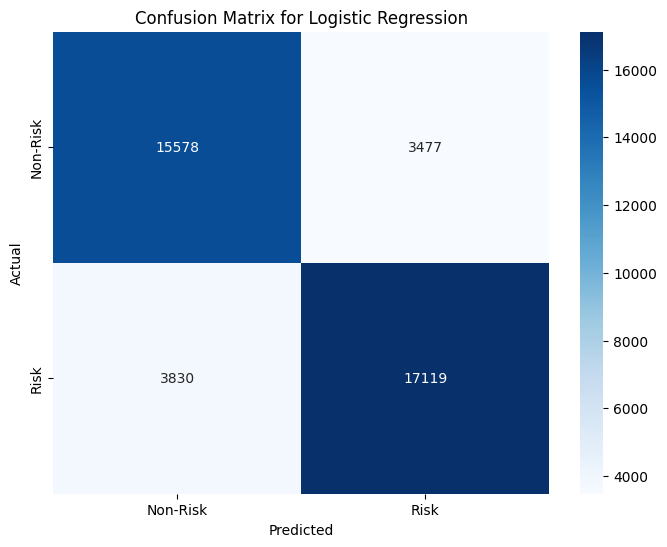

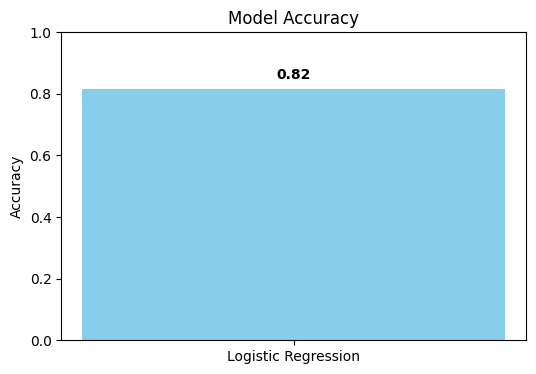

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Feature set and target variable
features = [
    'Heart Rate', 'Respiratory Rate', 'Body Temperature',
    'Oxygen Saturation', 'Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Derived_HRV',
    'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP'
]
X = df[features]
y = df['Risk Category']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initializing and training the Logistic Regression model
logistic_model = LogisticRegression(max_iter=2000, random_state=42, solver='saga')
logistic_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = logistic_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Risk', 'Risk'], yticklabels=['Non-Risk', 'Risk'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualizing the accuracy score
plt.figure(figsize=(6, 4))
plt.bar(['Logistic Regression'], [accuracy], color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.text(0, accuracy + 0.02, f"{accuracy:.2f}", ha='center', va='bottom', fontweight='bold')
plt.show()


GaussianNB

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
# Define feature set and target variable
features = [
    'Heart Rate', 'Respiratory Rate', 'Body Temperature',
    'Oxygen Saturation', 'Age', 'Gender',
    'Weight (kg)', 'Height (m)', 'Derived_HRV',
    'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP'
]
X = df[features]  # Features
y = df['Risk Category']  # Target variable
# Feature Selection: Select the best k features (e.g., k=8)
k_best = 8
selector = SelectKBest(score_func=f_classif, k=k_best)
X_new = selector.fit_transform(X, y)
selected_features = selector.get_support(indices=True)
selected_feature_names = [features[i] for i in selected_features]
# Print the selected feature names
print(f"Selected Features: {selected_feature_names}")
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
# Train the Naive Bayes classifier using cross-validation
cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")
# Fit the model on the training data
nb_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred = nb_classifier.predict(X_test)
# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Selected Features: ['Heart Rate', 'Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Derived_HRV', 'Derived_Pulse_Pressure', 'Derived_BMI']
Cross-Validation Accuracy: 0.90 ± 0.00
Test Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.89     19055
           1       0.88      0.95      0.91     20949

    accuracy                           0.90     40004
   macro avg       0.91      0.90      0.90     40004
weighted avg       0.91      0.90      0.90     40004



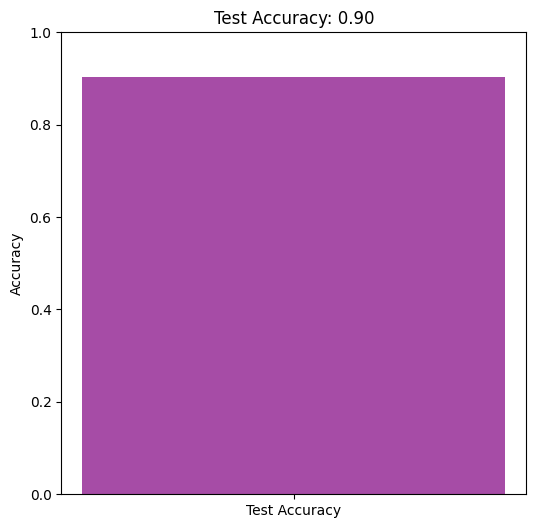

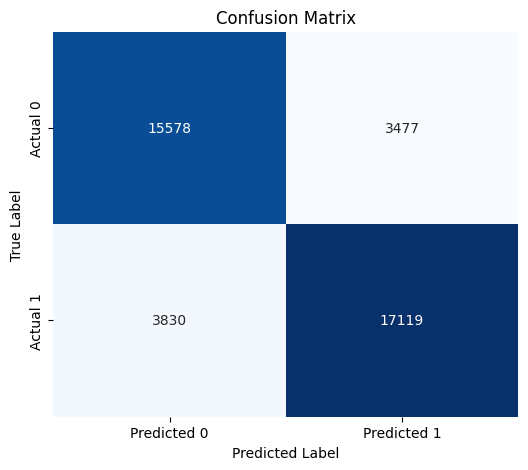

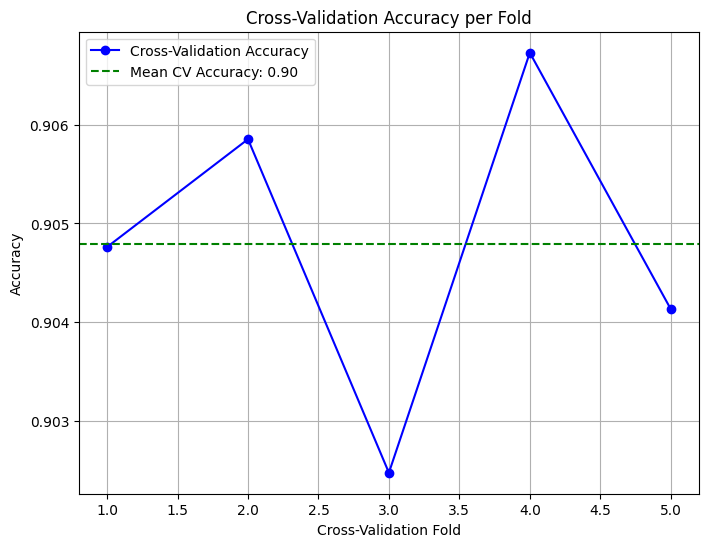

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# 2. Test Accuracy Bar Plot
plt.figure(figsize=(6, 6))
plt.bar(['Test Accuracy'], [test_accuracy], color='purple', alpha=0.7)
plt.ylim(0, 1)  # Ensure y-axis goes from 0 to 1 for a clearer view of accuracy percentage
plt.ylabel('Accuracy')
plt.title(f'Test Accuracy: {test_accuracy:.2f}')
plt.show()

# 3. Confusion Matrix
# Predicting on the test set to get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# 1. Cross-Validation Accuracy Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', color='blue', label='Cross-Validation Accuracy')
plt.axhline(y=cv_scores.mean(), color='green', linestyle='--', label=f'Mean CV Accuracy: {cv_scores.mean():.2f}')

plt.xlabel('Cross-Validation Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy per Fold')
plt.legend(loc='best')
plt.grid(True)
plt.show()






KNN - K - Nearest Neighbor

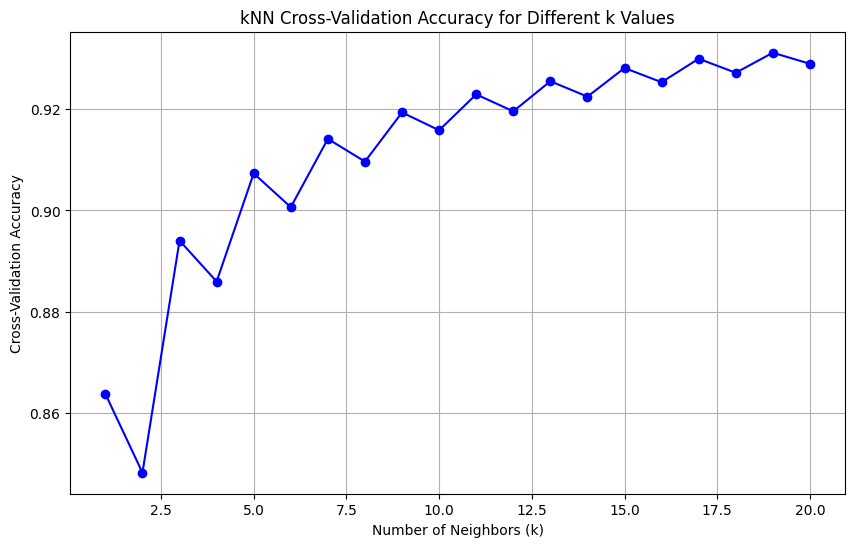

Optimal k based on cross-validation: 19
Test Accuracy with k=19: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     19055
           1       0.94      0.93      0.94     20949

    accuracy                           0.93     40004
   macro avg       0.93      0.93      0.93     40004
weighted avg       0.93      0.93      0.93     40004



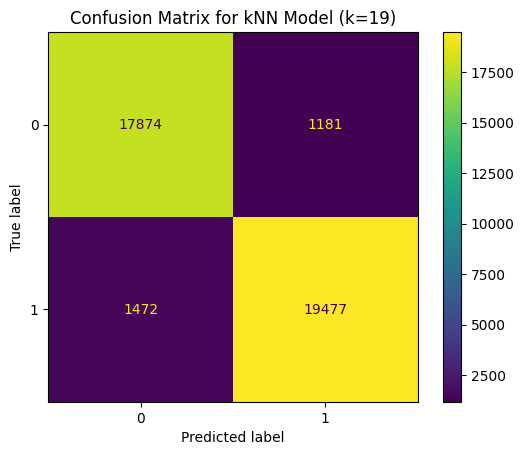

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define feature set and target variable
features = [
    'Heart Rate', 'Respiratory Rate', 'Body Temperature',
    'Oxygen Saturation', 'Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Derived_HRV',
    'Derived_Pulse_Pressure', 'Derived_BMI', 'Derived_MAP'
]
X = df[features]
y = df['Risk Category']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features to reduce the impact of scale differences
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Find optimal k using cross-validation
k_range = range(1, 21)  # Test k from 1 to 20
cv_scores = []  # Store cross-validation scores

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())

# Plot k vs. cross-validation accuracy to find the best k
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o', color='b', label="Cross-Validation Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validation Accuracy")
plt.title("kNN Cross-Validation Accuracy for Different k Values")
plt.grid(True)
plt.show()

# Use the best k based on cross-validation scores
optimal_k = k_range[np.argmax(cv_scores)]
print(f"Optimal k based on cross-validation: {optimal_k}")

# Train the kNN model with the optimal k
knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
knn_model.fit(X_train, y_train)

# Test accuracy
y_pred = knn_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with k={optimal_k}: {test_accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test)
plt.title(f"Confusion Matrix for kNN Model (k={optimal_k})")
plt.show()
